In [1]:
# Data Analysis Notebook for x_dif Target Variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display plots inline
%matplotlib inline

# Increase plot resolution for retina displays
%config InlineBackend.figure_format = 'retina'


In [2]:
# Load the data
data_file = 'data/measurements_grid_cleaned.csv'

# Check if the data file exists
if os.path.exists(data_file):
    df = pd.read_csv(data_file)
    print(f"Data loaded from {data_file}")
    print(f"Dataset shape: {df.shape}")
else:
    print(f"Data file {data_file} does not exist. Please check the file path.")


Data loaded from data/measurements_grid_cleaned.csv
Dataset shape: (11911, 21)


In [3]:
# Display first few rows
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


,step_order,Timestamp,x_dif,y_dif,z_dif,rx_dif,ry_dif,rz_dif,joint_1,joint_2,...,joint_4,joint_5,joint_6,measurement_temperature,x_set,y_set,z_set,rx_set,ry_set,rz_set
0,0,20200714163904,0.365141,-0.000213,1.4273,1.57002,1.57007,1.57073,-1.57080,-1.57080,...,-1.570800,0.000000,0.000000,23.68,2361.617959,-1368.547187,117.96983,-91.979171,-61.455175,-92.458168
1,1,20200714163924,0.800000,0.600000,0.9000,1.74533,1.57080,1.57080,-2.14055,-2.08493,...,-0.218756,0.393594,-0.001879,23.68,1684.479700,-1665.945600,-416.71103,-92.027993,-51.246157,-92.496809
2,2,20200714163933,0.800000,0.600000,0.9000,1.57080,1.74533,1.57080,-2.16052,-2.02730,...,-0.188110,0.588775,-0.176423,23.68,1686.073500,-1663.699700,-416.83957,-92.157943,-61.510872,-102.791880
3,3,20200714163940,0.800000,0.600000,0.9000,1.57080,1.91986,1.57080,-2.16059,-2.02693,...,-0.190553,0.588919,-0.348344,23.68,1686.047700,-1663.641500,-416.81712,-92.304736,-61.657359,-112.926520
4,4,20200714163947,0.800000,0.600000,0.9000,1.57080,2.09440,1.57080,-2.16037,-2.02698,...,-0.189535,0.588486,-0.523894,23.68,1686.203100,-1663.666000,-416.82875,-92.249367,-61.799429,-122.869330


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
step_order                 0
Timestamp                  0
x_dif                      0
y_dif                      0
z_dif                      0
rx_dif                     0
ry_dif                     0
rz_dif                     0
joint_1                    0
joint_2                    0
joint_3                    0
joint_4                    0
joint_5                    0
joint_6                    0
measurement_temperature    0
x_set                      0
y_set                      0
z_set                      0
rx_set                     0
ry_set                     0
rz_set                     0
dtype: int64


In [5]:
# Handling missing values (if any)
if df.isnull().sum().any():
    print("Handling missing values by dropping rows with missing values.")
    df = df.dropna()
    print(f"New dataset shape after dropping missing values: {df.shape}")
else:
    print("No missing values detected.")


No missing values detected.


In [6]:
# Define target variable and input features
target_variable = 'x_dif'  # Your current target is x deviation
joint_features = [f'joint_{i}' for i in range(1, 7)]
setpoint_features = ['x_set', 'y_set', 'z_set', 'rx_set', 'ry_set', 'rz_set']
input_features = joint_features + setpoint_features

# Ensure all necessary columns are present
required_columns = [target_variable] + input_features
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"The following required columns are missing from the dataset: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


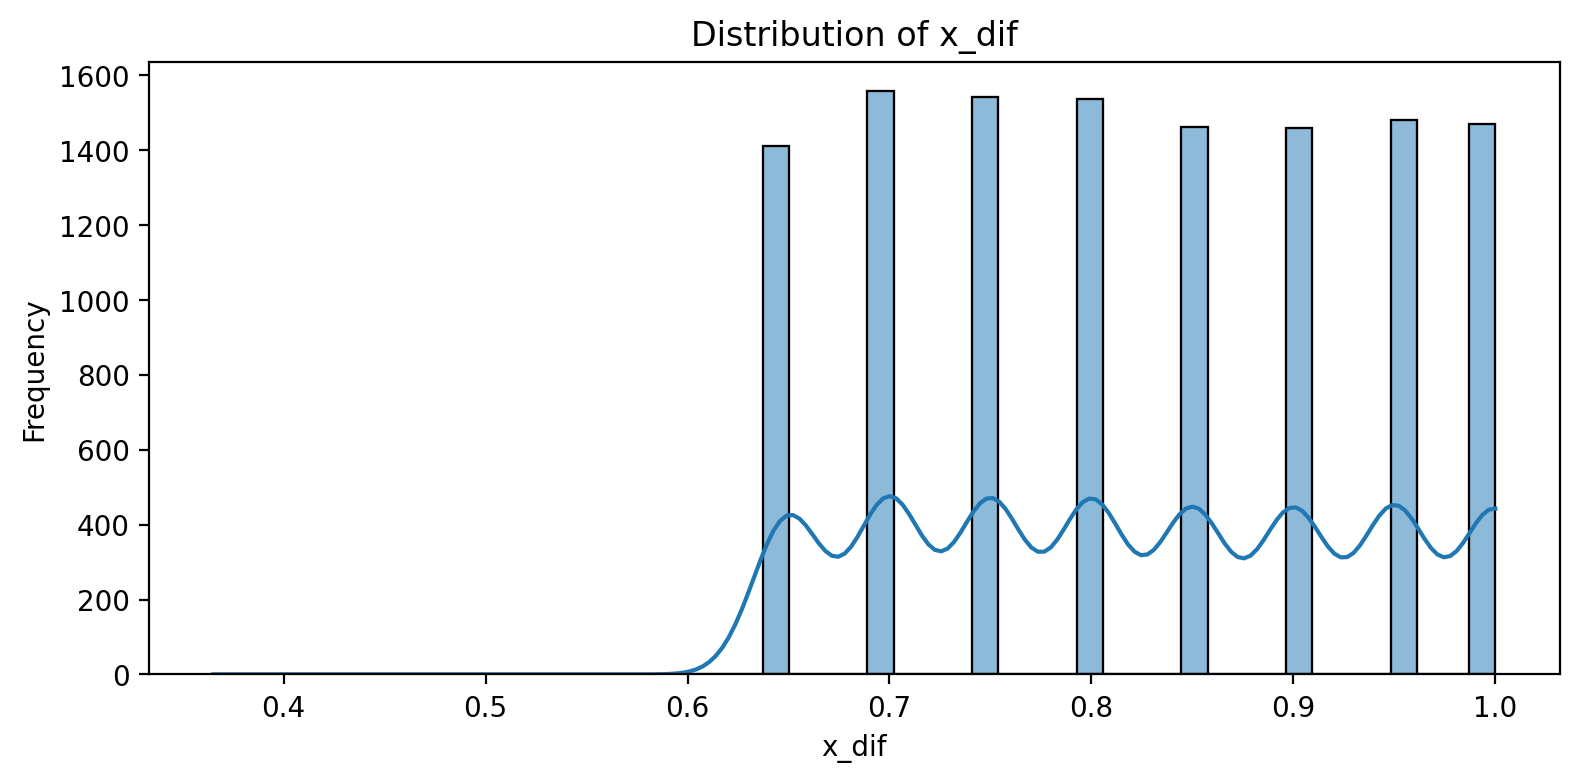

In [7]:
# Visualize distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df[target_variable], kde=True)
plt.title(f"Distribution of {target_variable}")
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [8]:
# Compute correlations between input features and the target variable
print("Correlation between input features and the target variable:")
corr_matrix = df[input_features + [target_variable]].corr()
corr_with_target = corr_matrix[[target_variable]].loc[input_features]
corr_with_target


Correlation between input features and the target variable:


,x_dif
joint_1,-0.015874
joint_2,-0.081773
joint_3,0.113412
joint_4,-0.130435
joint_5,0.007699
joint_6,0.070439
x_set,-0.469725
y_set,0.197545
z_set,0.008426
rx_set,0.000878


/var/folders/f0/5y2fvxyx19v5c9s51q6qyp6c0000gp/T/ipykernel_40782/3752756821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target_sorted[target_variable], palette='viridis')


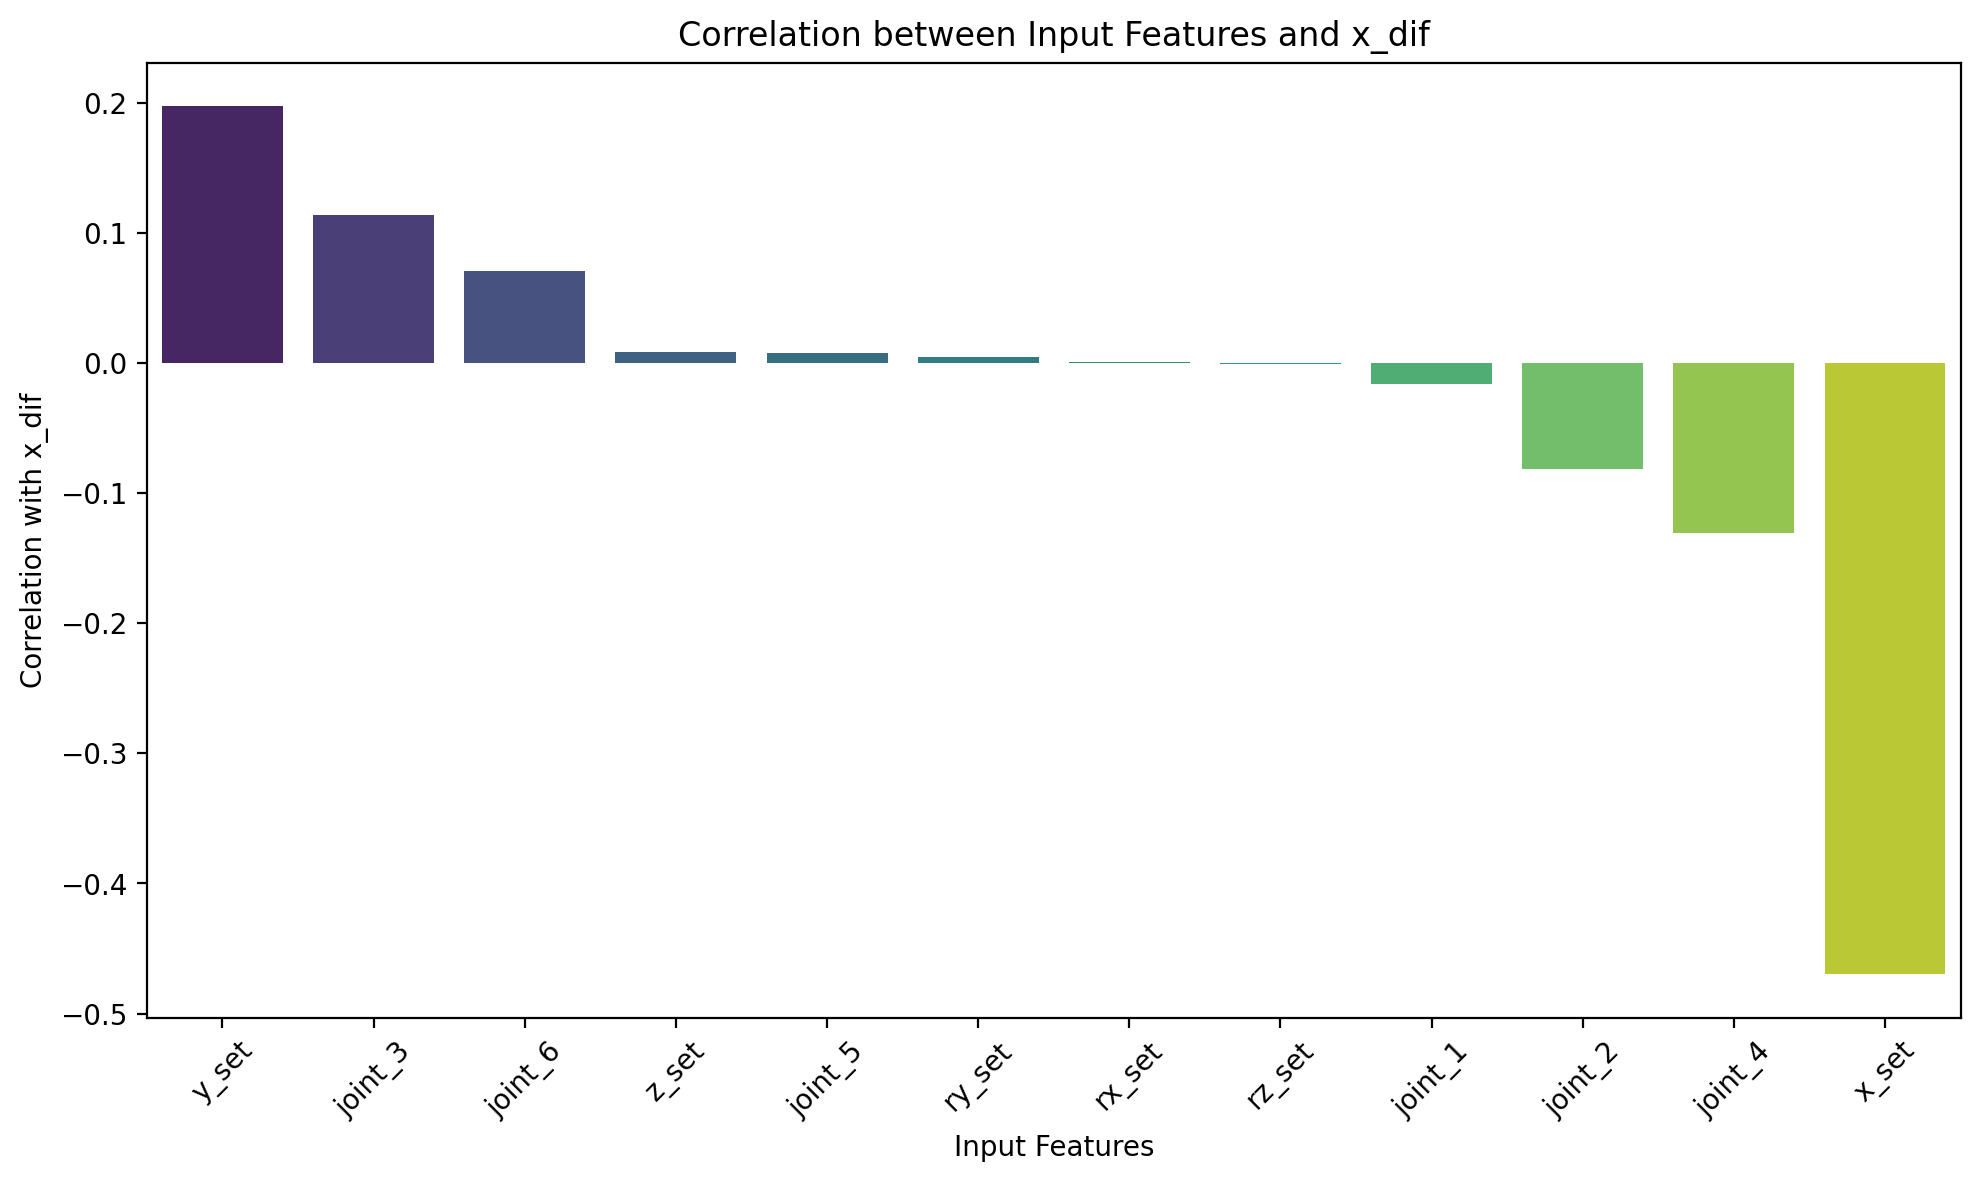

In [9]:
# Visualize correlations with a bar plot
plt.figure(figsize=(10, 6))
corr_with_target_sorted = corr_with_target.sort_values(by=target_variable, ascending=False)
sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target_sorted[target_variable], palette='viridis')
plt.title(f"Correlation between Input Features and {target_variable}")
plt.xlabel("Input Features")
plt.ylabel(f"Correlation with {target_variable}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Identify features with high correlation to the target variable
threshold = 0.3  # Adjust the threshold based on your needs
high_corr_features = corr_with_target[
    corr_with_target[target_variable].abs() > threshold
]
print(f"Features with correlation |r| > {threshold} with {target_variable}:")
high_corr_features


Features with correlation |r| > 0.3 with x_dif:


,x_dif
x_set,-0.469725


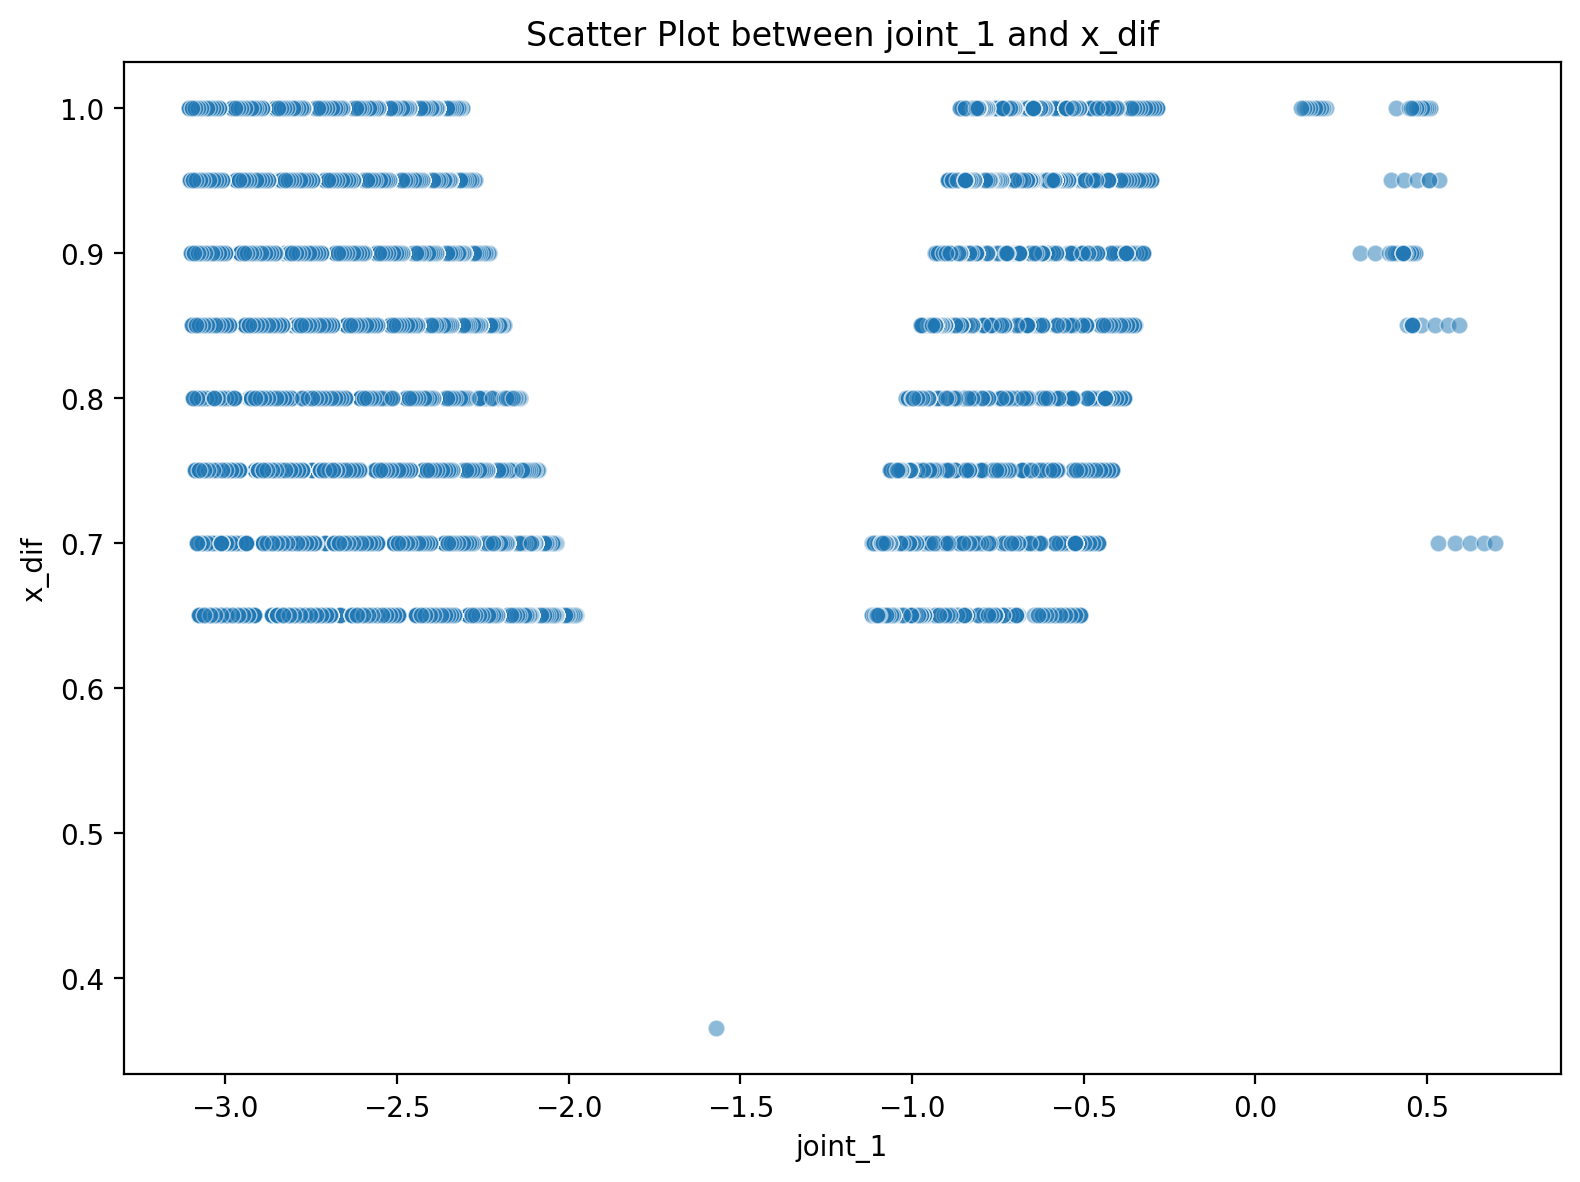

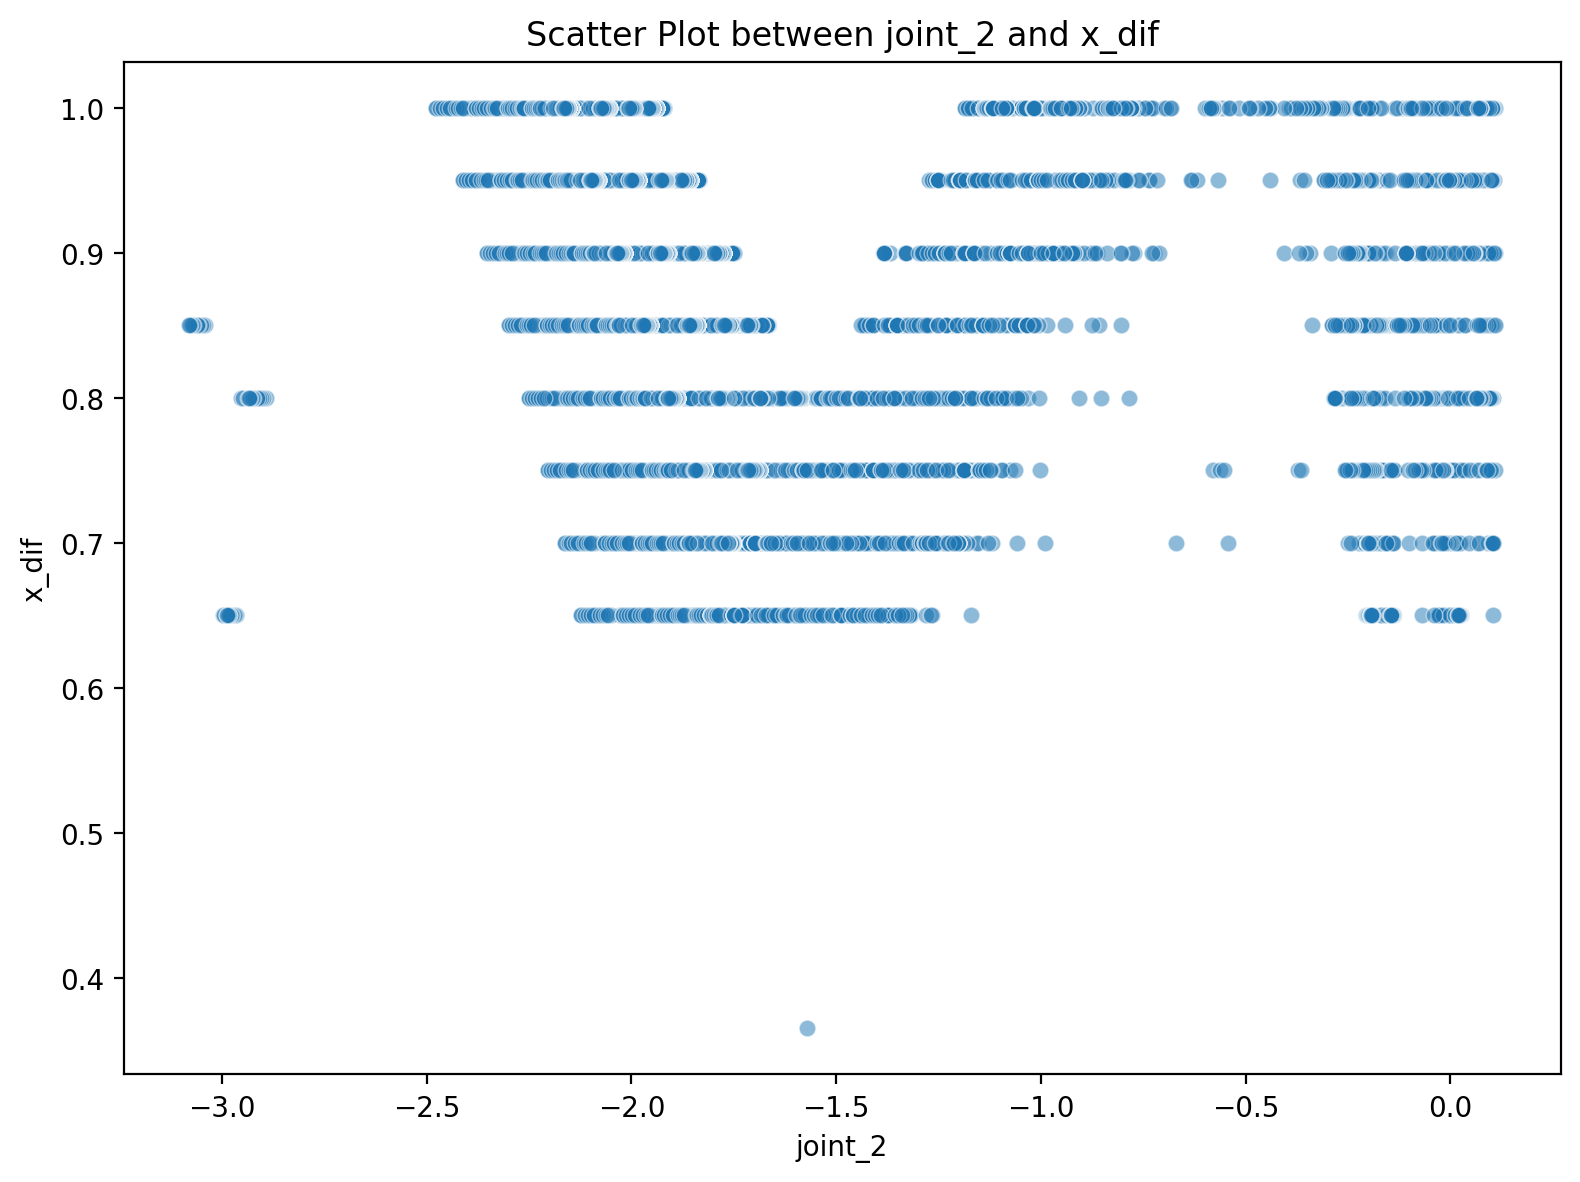

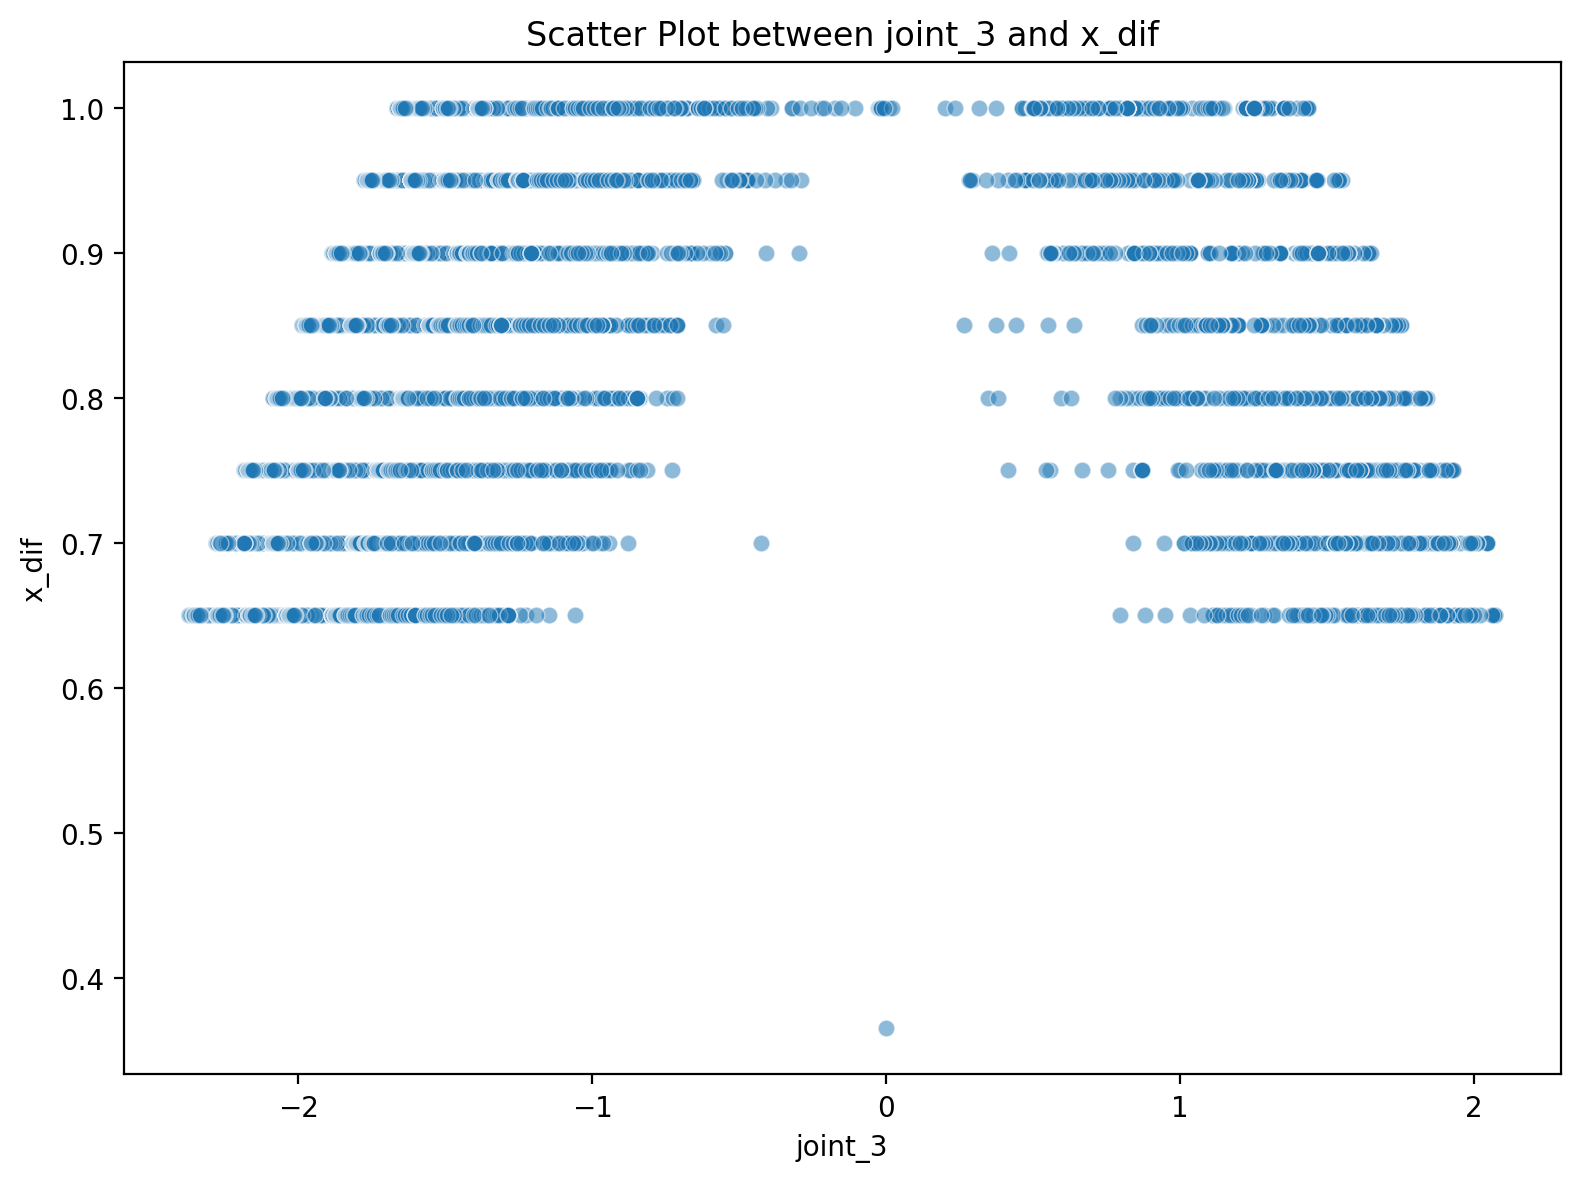

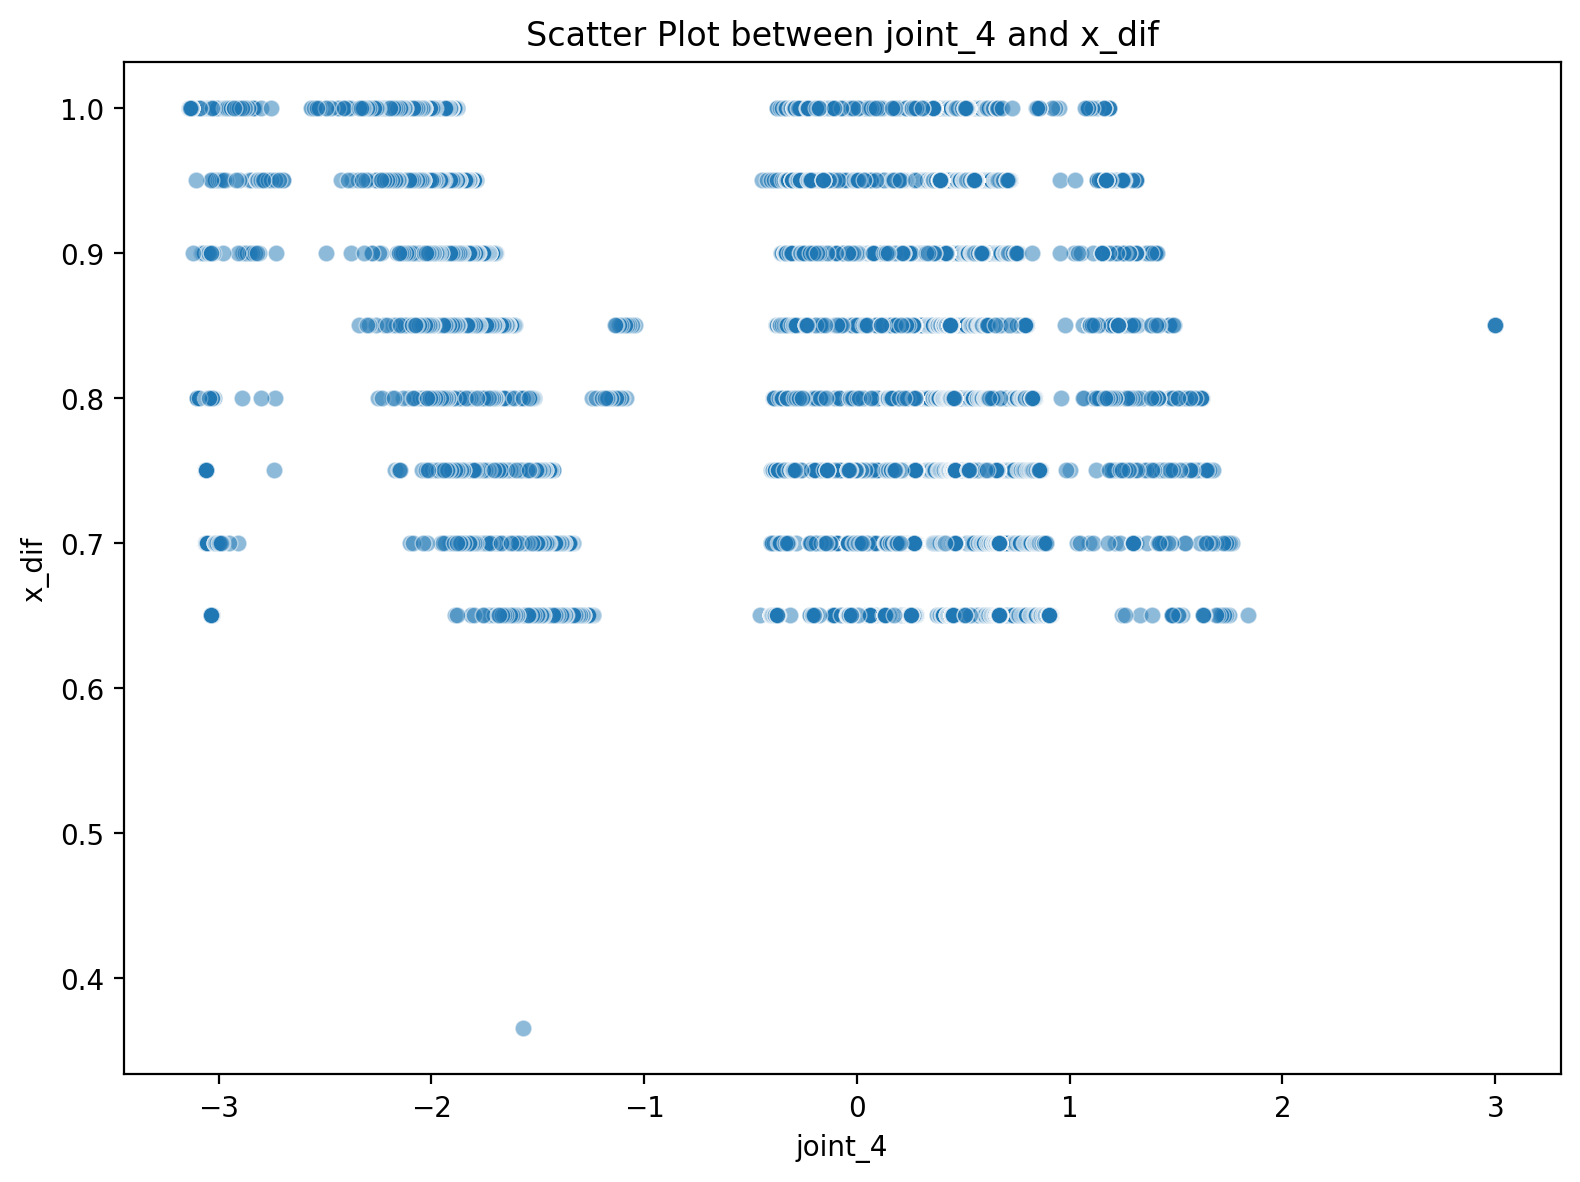

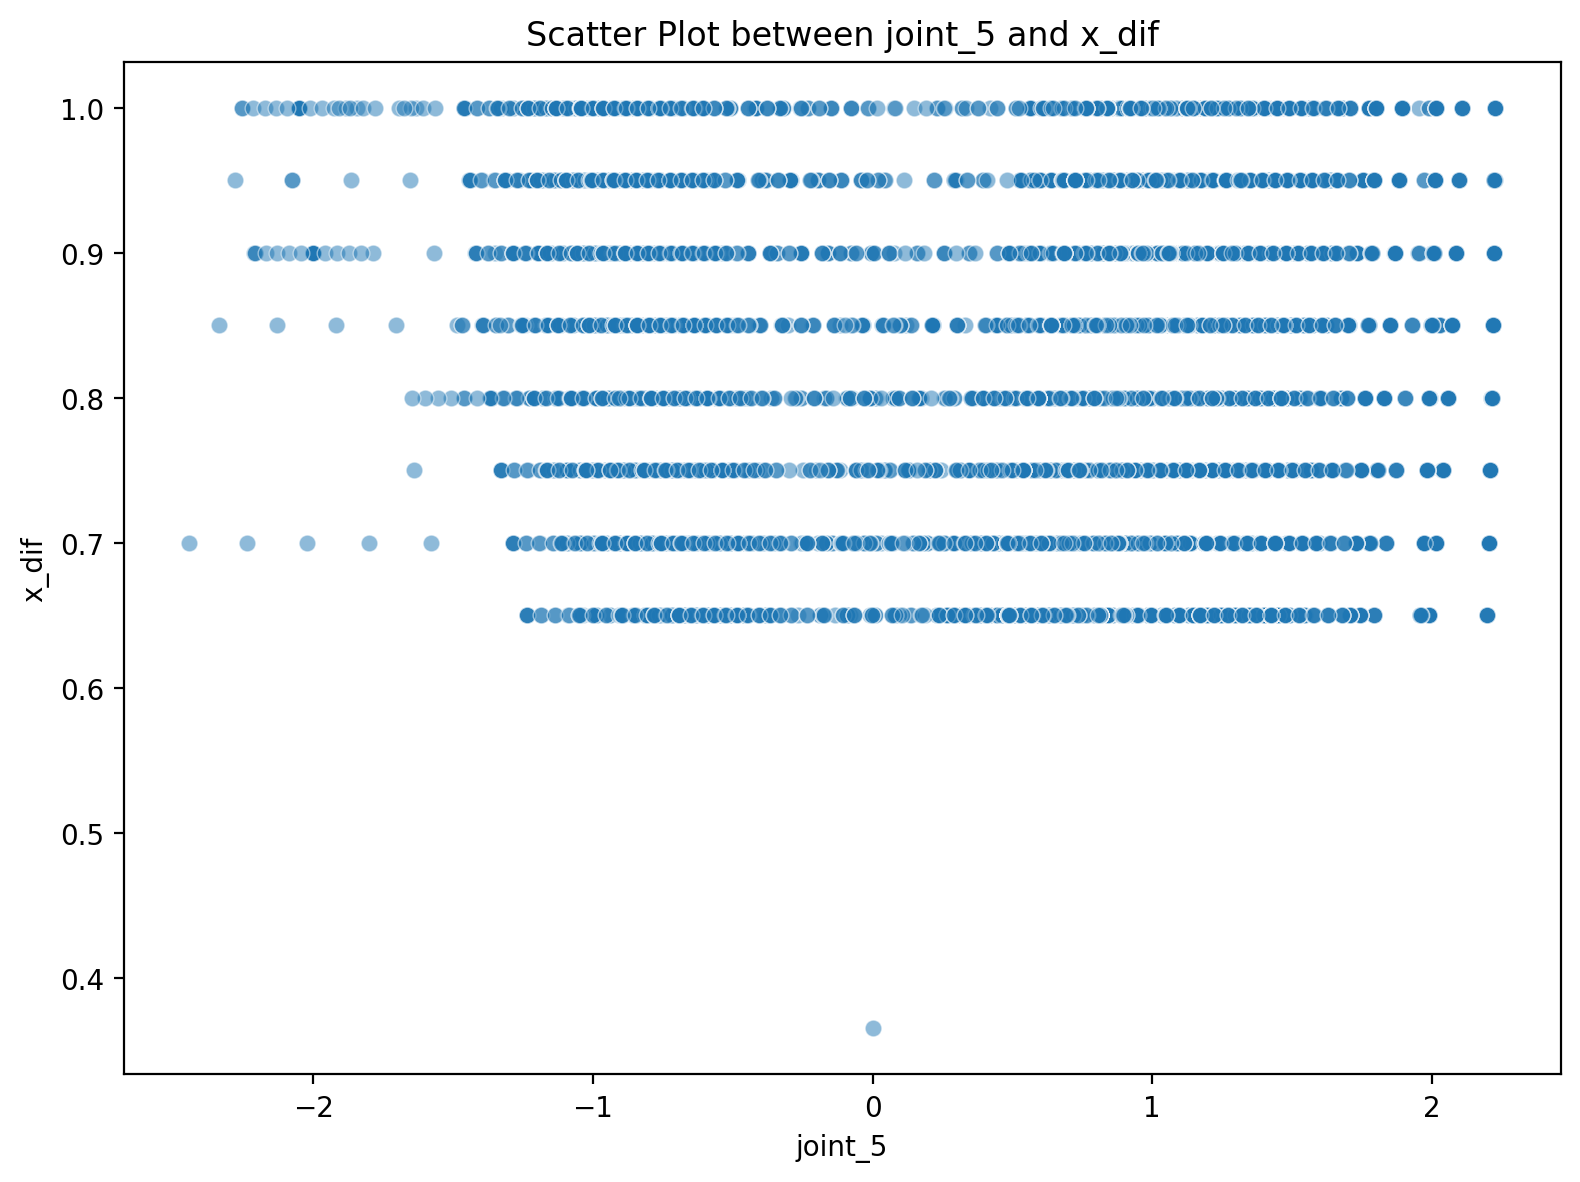

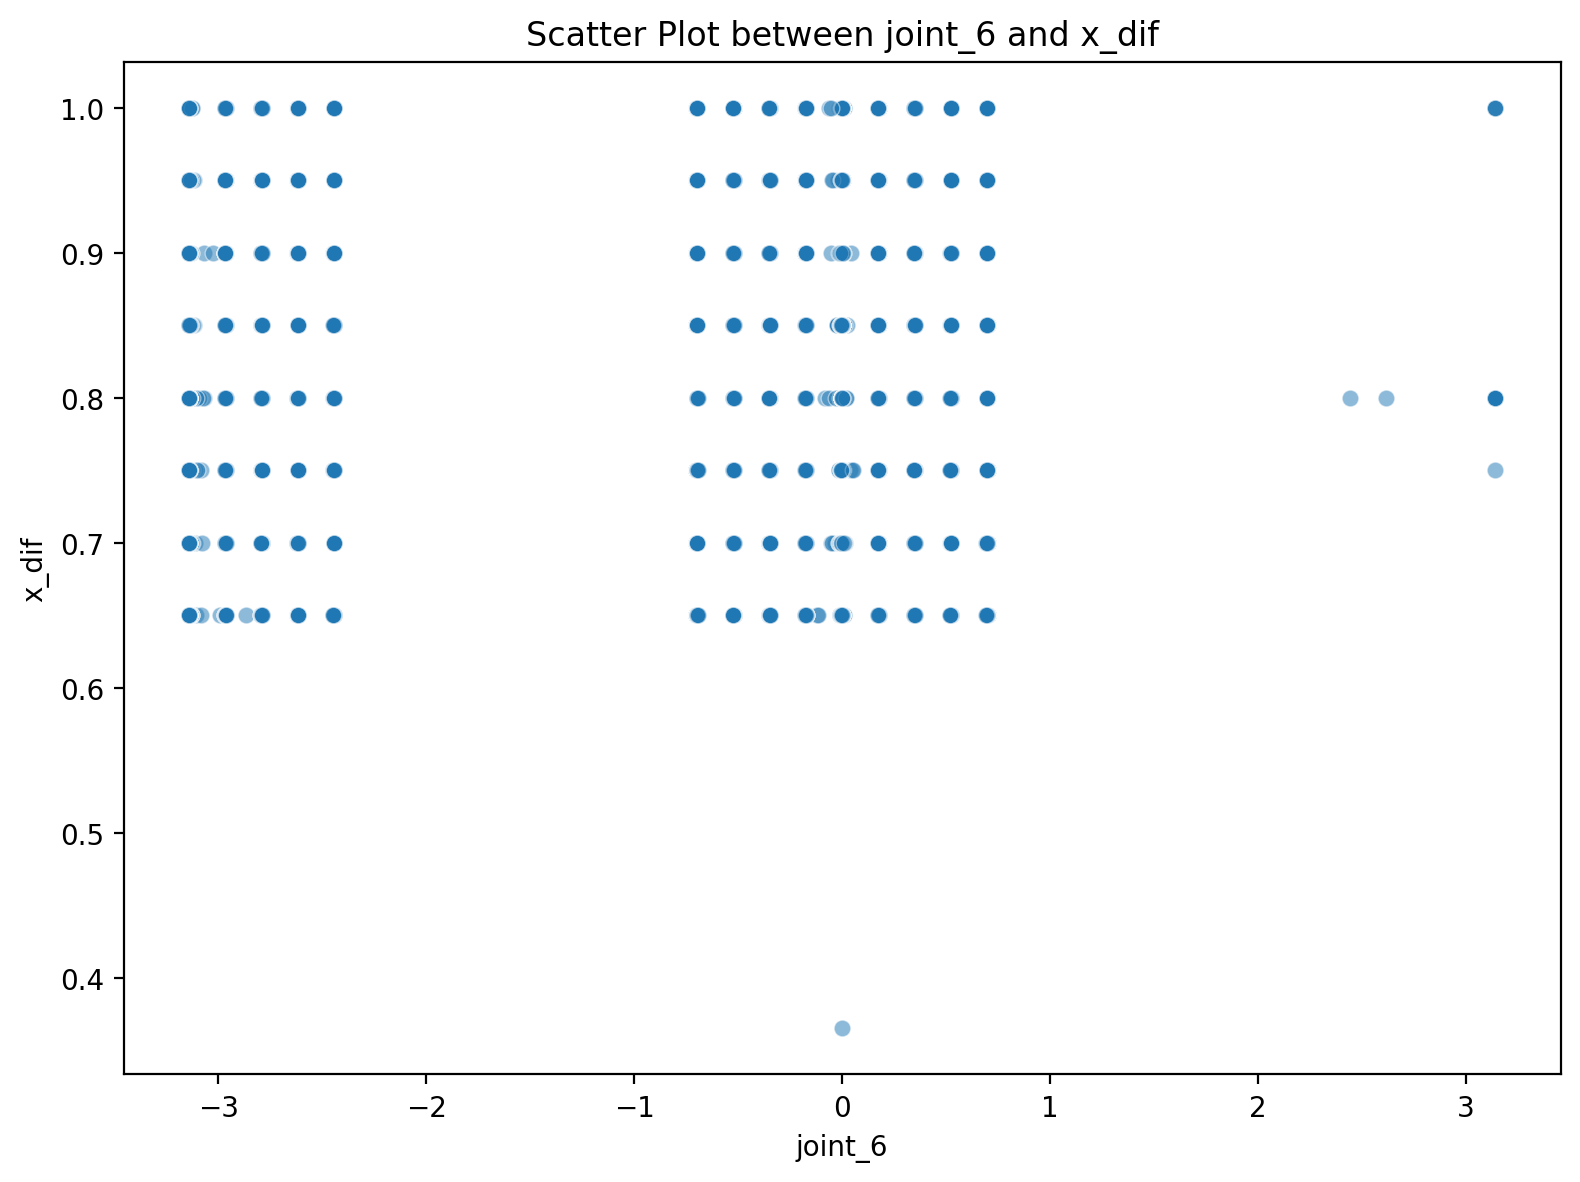

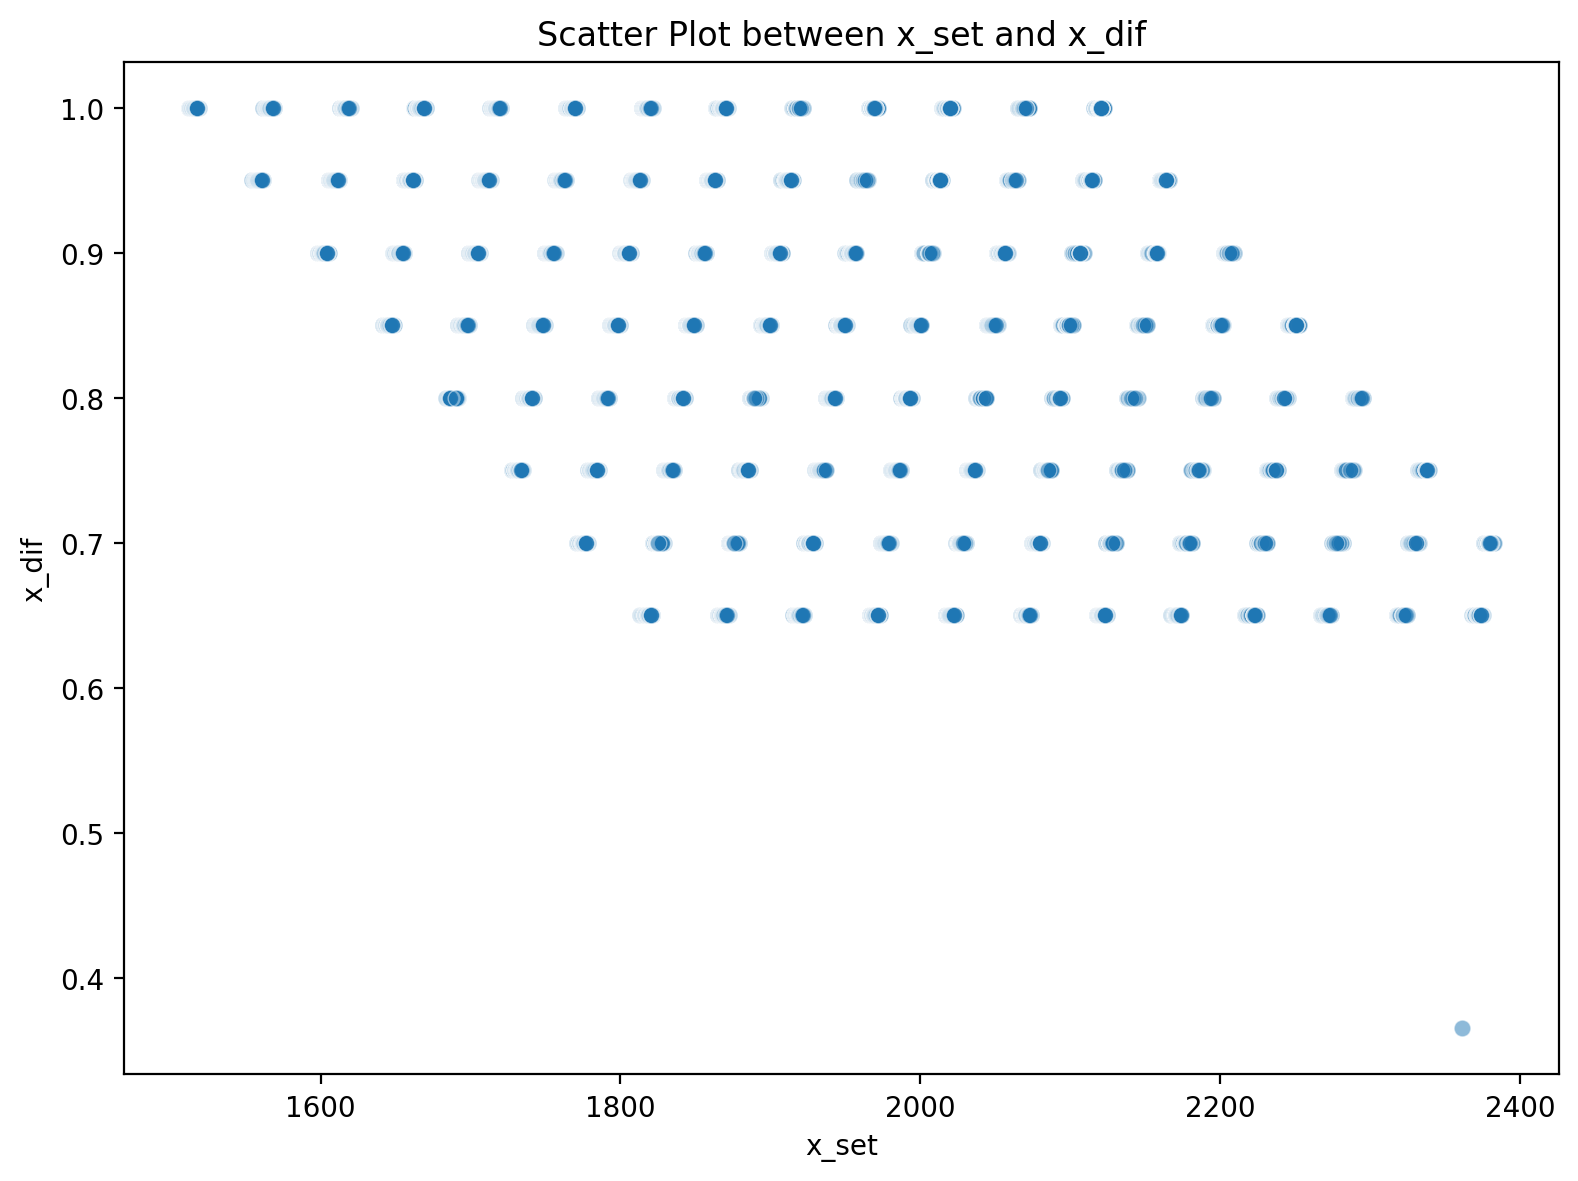

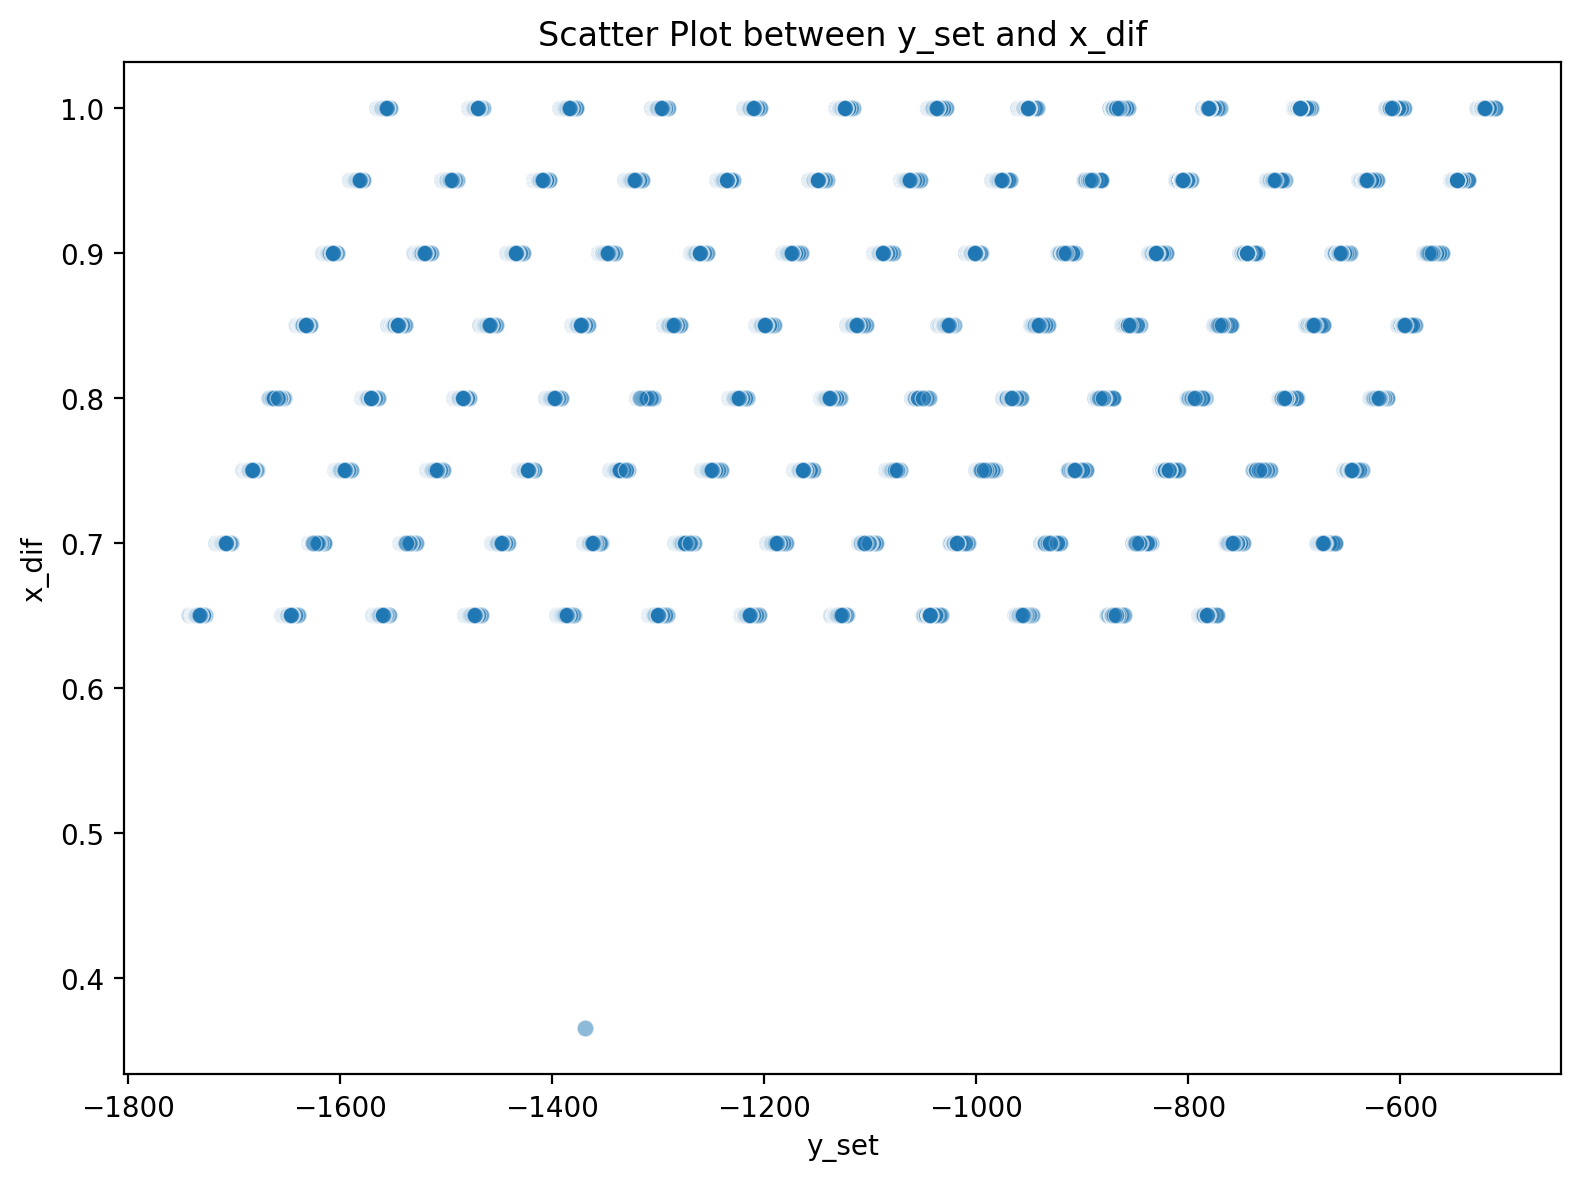

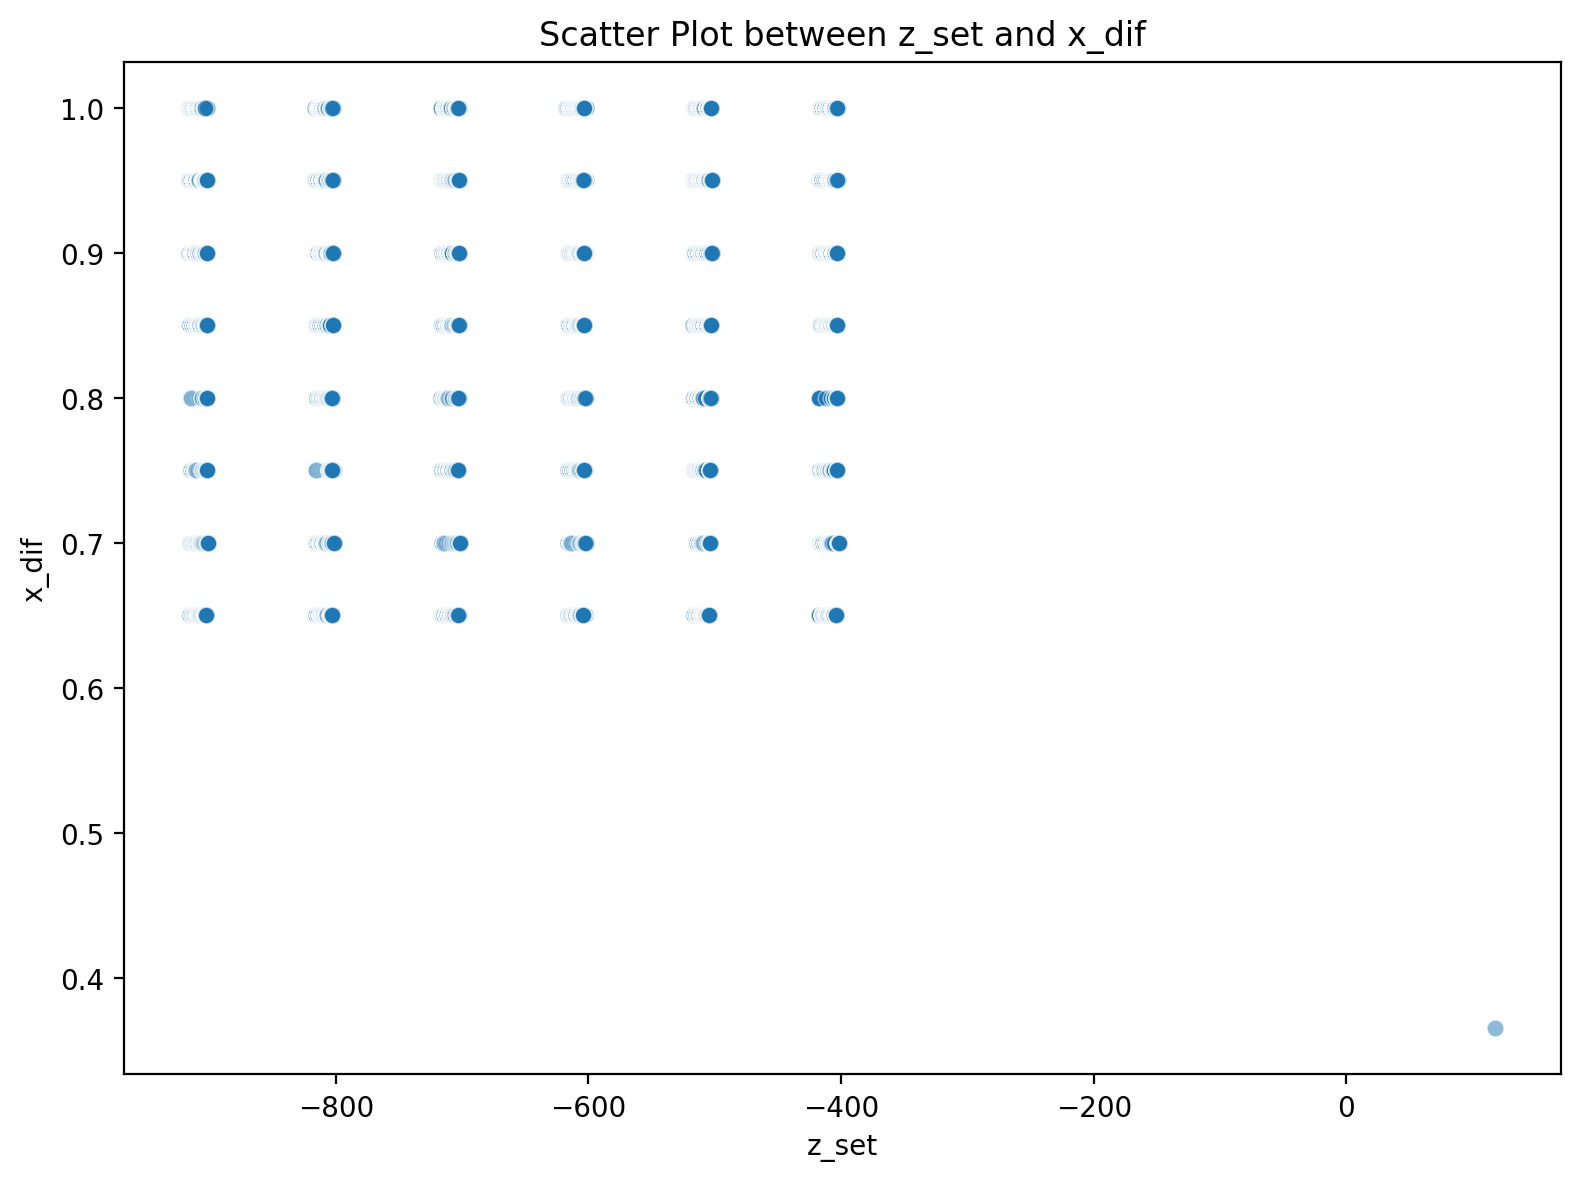

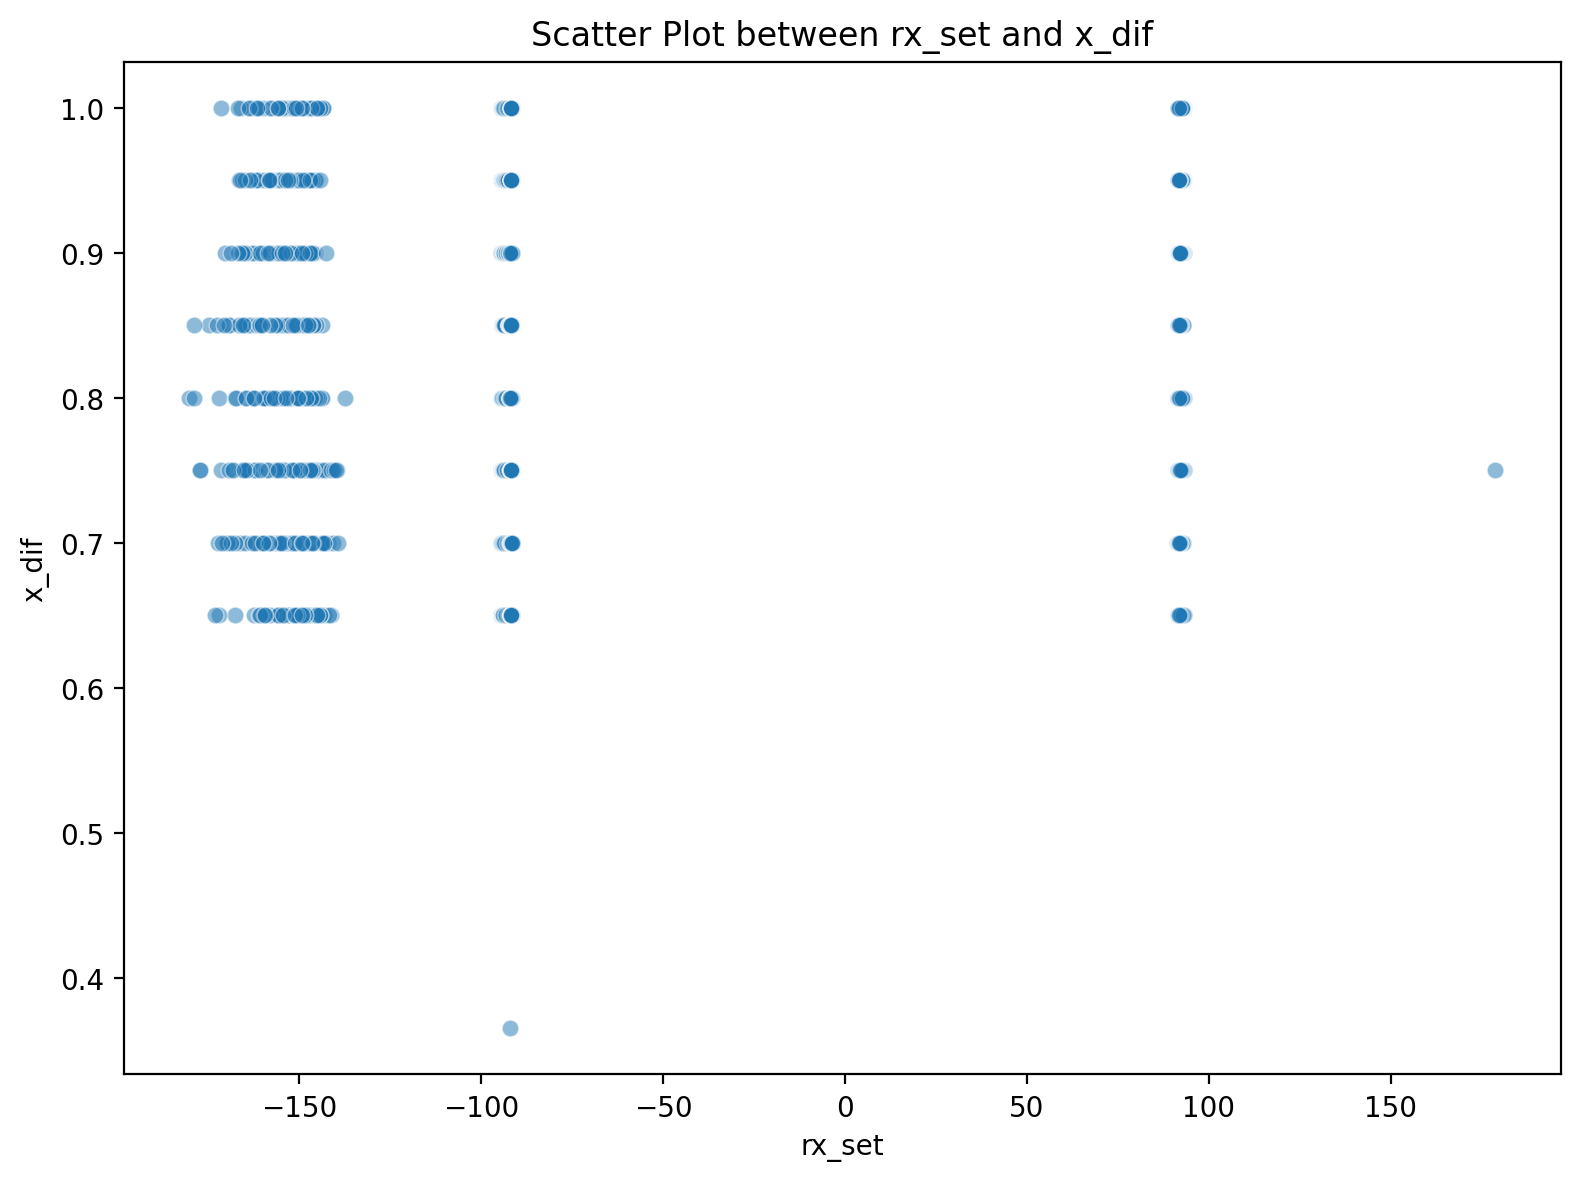

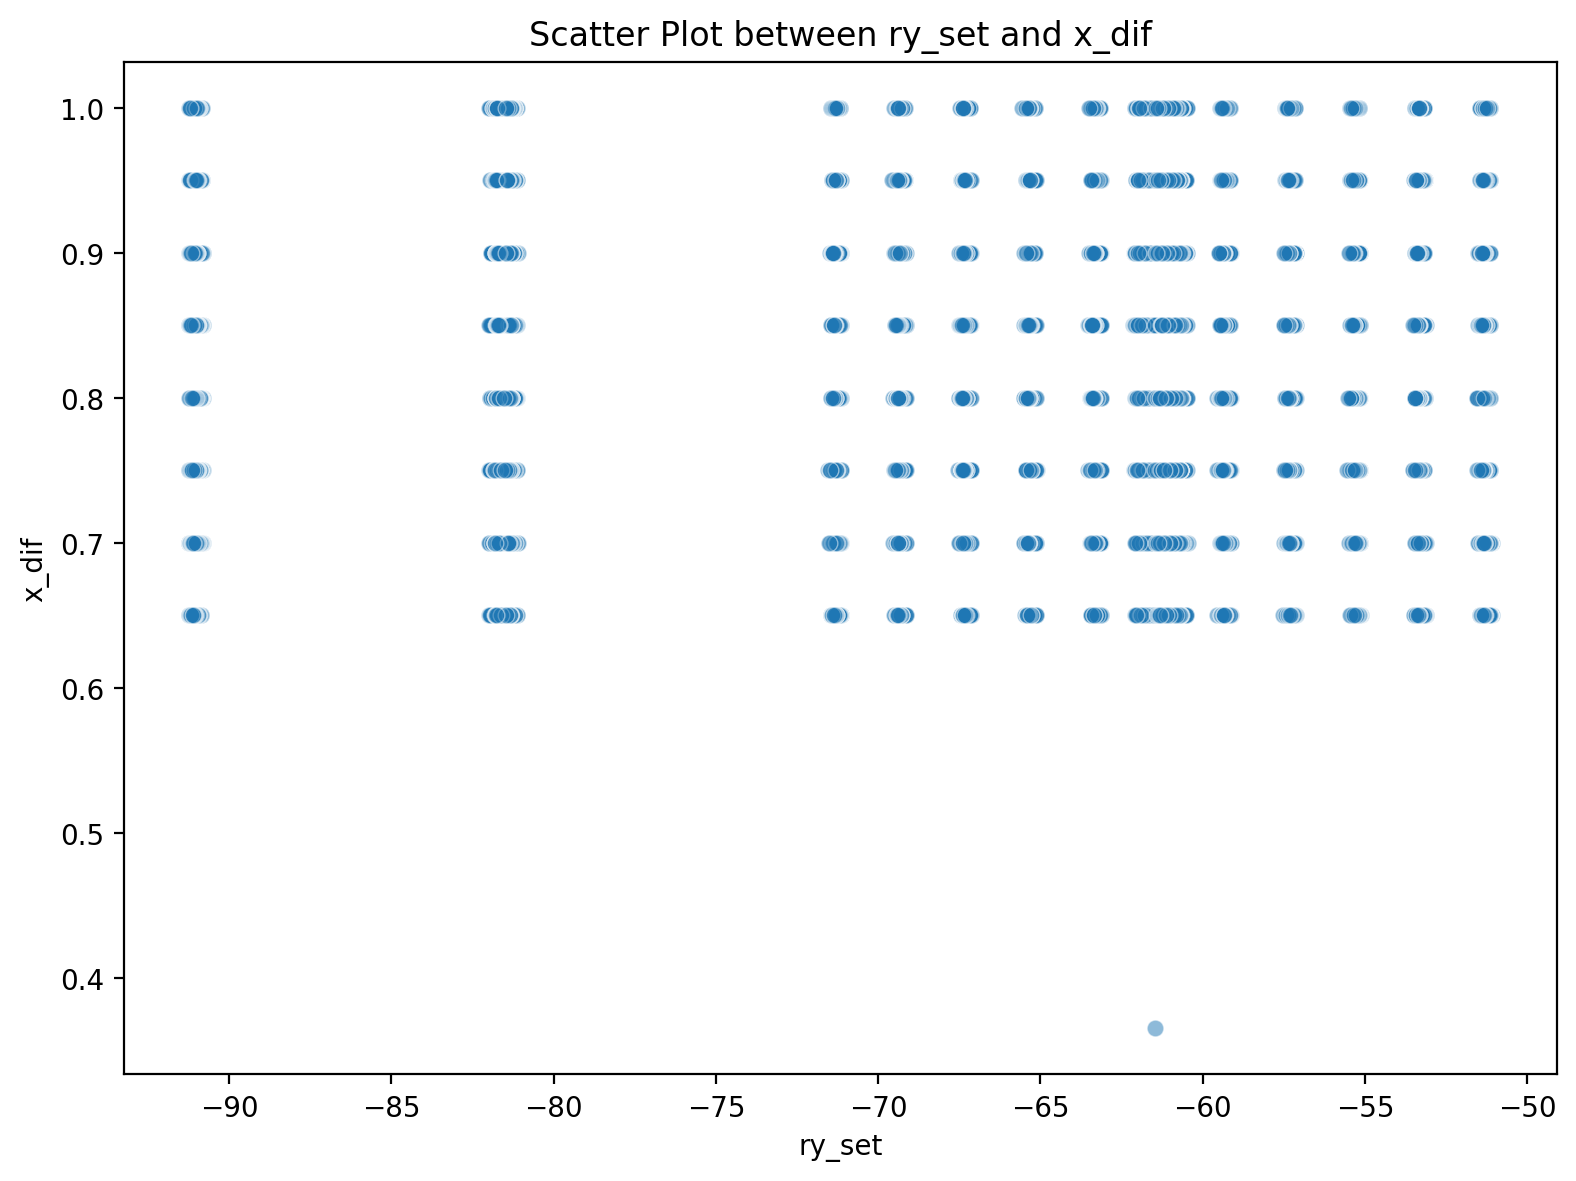

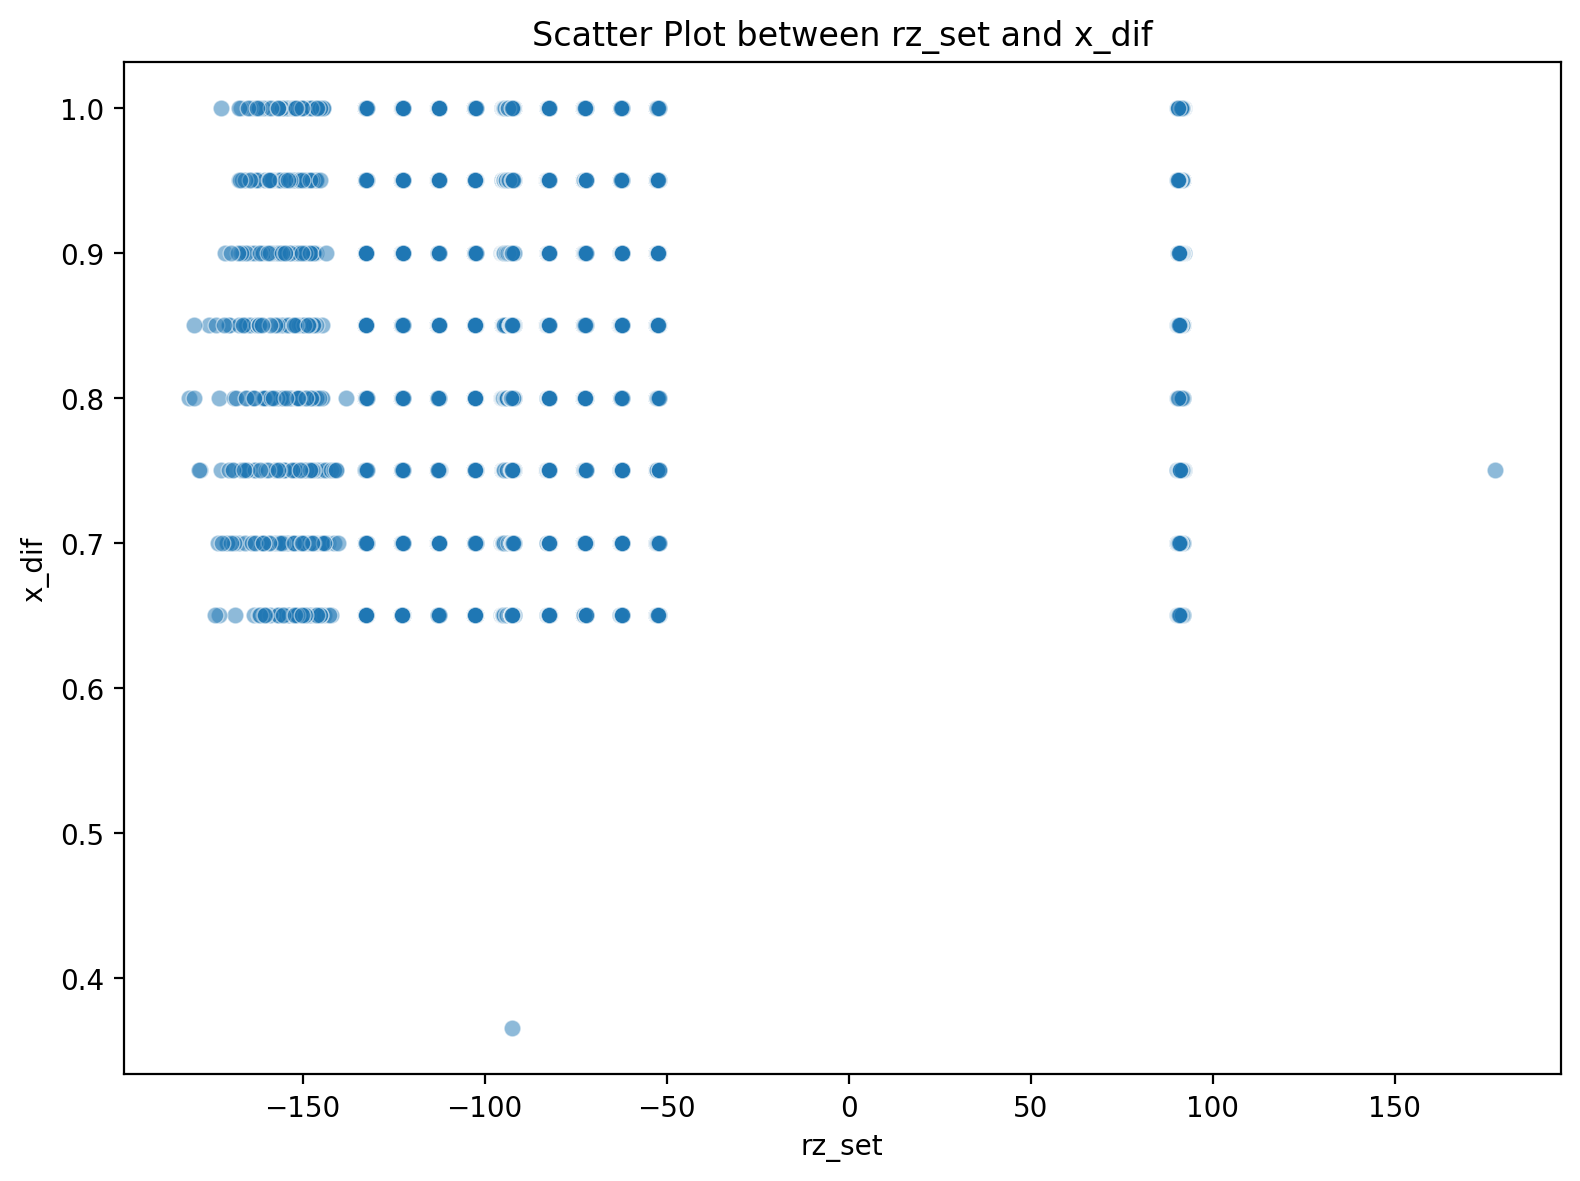

In [11]:
# Scatter plots of input features vs. target variable
for feature in input_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y=target_variable, alpha=0.5)
    plt.title(f"Scatter Plot between {feature} and {target_variable}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.tight_layout()
    plt.show()


In [12]:
# Pairwise correlation among input features
print("Pairwise correlation among input features:")
input_corr_matrix = df[input_features].corr()
input_corr_matrix


Pairwise correlation among input features:


,joint_1,joint_2,joint_3,joint_4,joint_5,joint_6,x_set,y_set,z_set,rx_set,ry_set,rz_set
joint_1,1.000000,0.775639,0.606491,-0.650381,-0.794428,-0.479940,0.527818,0.575653,0.251156,0.051823,-0.029459,0.092527
joint_2,0.775639,1.000000,0.128776,-0.601873,-0.712407,-0.219617,0.689734,0.708619,0.390677,0.077599,-0.077715,0.089840
joint_3,0.606491,0.128776,1.000000,-0.394960,-0.254065,-0.666843,0.334339,0.452346,0.065375,0.058458,-0.053127,0.115233
joint_4,-0.650381,-0.601873,-0.394960,1.000000,0.815826,-0.161019,-0.365294,-0.500568,-0.602068,-0.031911,0.028270,-0.013119
joint_5,-0.794428,-0.712407,-0.254065,0.815826,1.000000,-0.046726,-0.343753,-0.377101,-0.425242,0.002776,-0.151321,0.013063
joint_6,-0.479940,-0.219617,-0.666843,-0.161019,-0.046726,1.000000,-0.433065,-0.429787,0.241593,-0.082554,0.092121,-0.043428
x_set,0.527818,0.689734,0.334339,-0.365294,-0.343753,-0.433065,1.000000,0.772611,0.121233,0.089402,-0.062728,0.117920
y_set,0.575653,0.708619,0.452346,-0.500568,-0.377101,-0.429787,0.772611,1.000000,0.142398,0.102140,-0.069466,0.132117
z_set,0.251156,0.390677,0.065375,-0.602068,-0.425242,0.241593,0.121233,0.142398,1.000000,-0.001403,-0.008279,-0.025105
rx_set,0.051823,0.077599,0.058458,-0.031911,0.002776,-0.082554,0.089402,0.102140,-0.001403,1.000000,-0.061221,0.892308


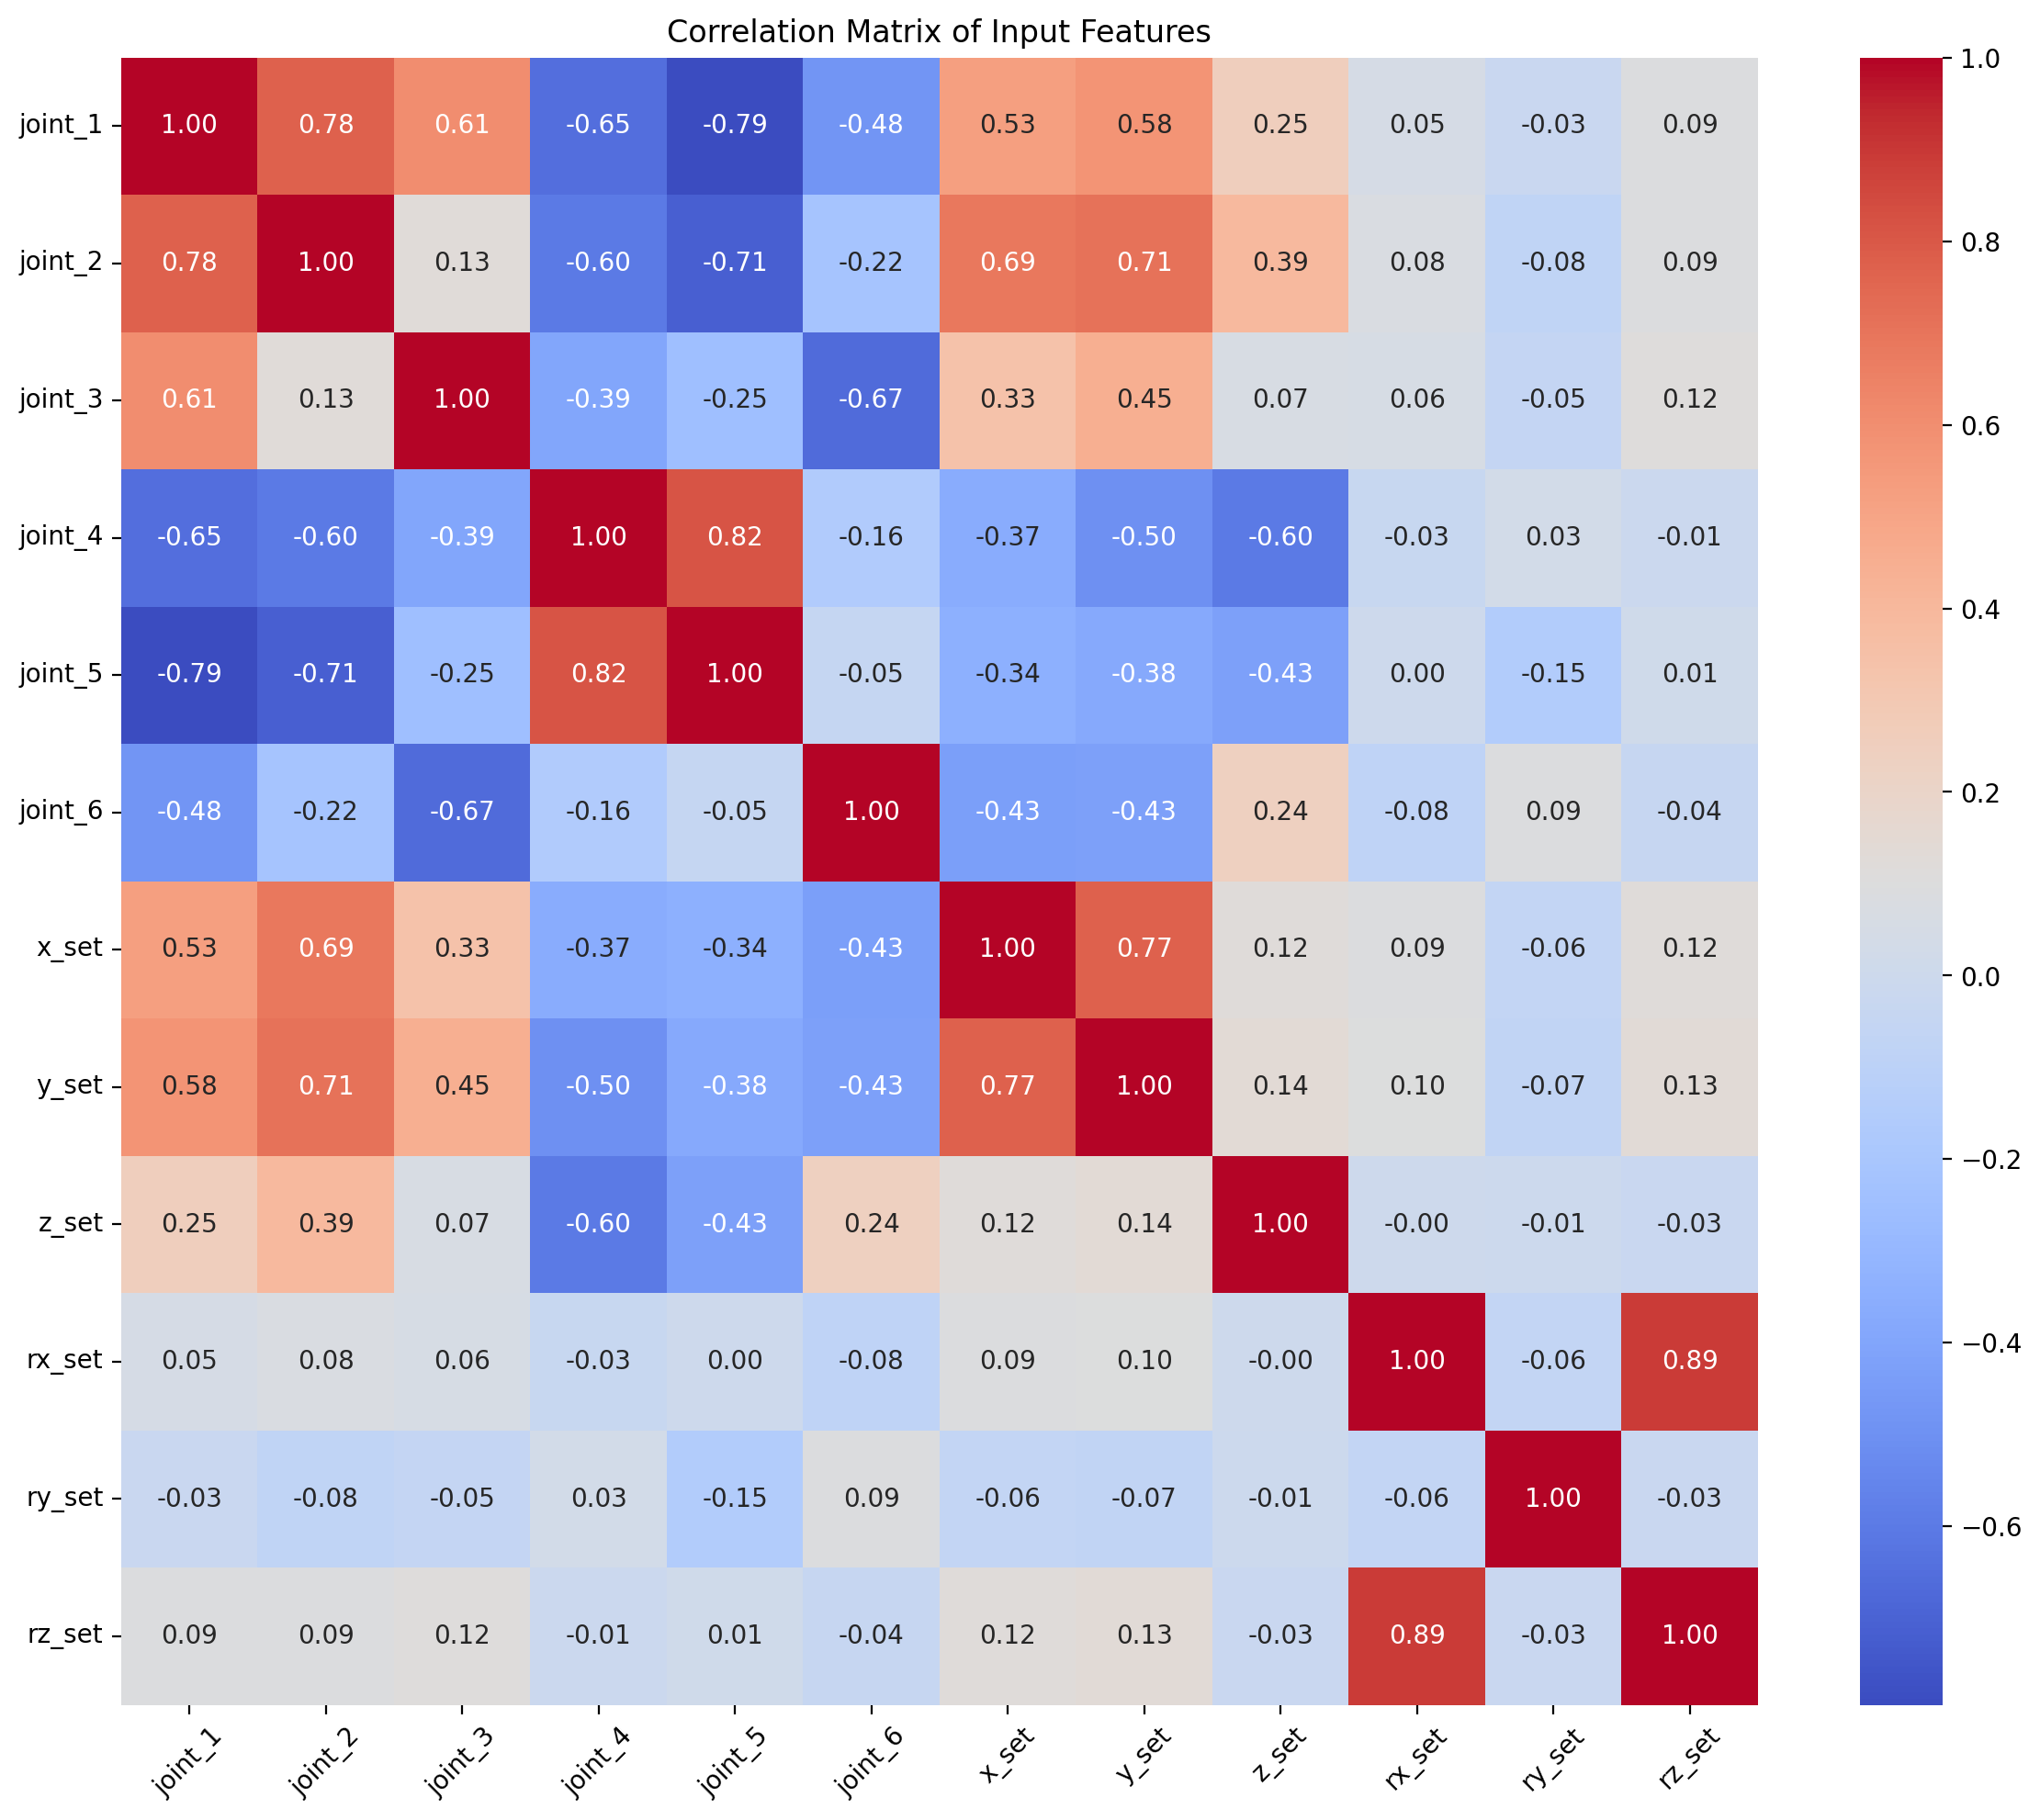

In [13]:
# Visualize input feature correlations with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(input_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Input Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
# Check for multicollinearity among input features
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Calculating Variance Inflation Factor (VIF) for input features:")

# Prepare data for VIF calculation
X = df[input_features]
X = X.assign(constant=1)  # Add a constant term for intercept

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]

# Remove the constant term from VIF data
vif_data = vif_data[vif_data['Feature'] != 'constant']
vif_data = vif_data.reset_index(drop=True)
vif_data


Calculating Variance Inflation Factor (VIF) for input features:


,Feature,VIF
0,joint_1,4.783065e+01
1,joint_2,7.425297e+05
2,joint_3,1.544630e+06
3,joint_4,1.486276e+06
4,joint_5,1.281684e+01
5,joint_6,1.528618e+06
6,x_set,3.764869e+00
7,y_set,9.856484e+00
8,z_set,3.316076e+00
9,rx_set,4.467922e+05


In [15]:
# Identify features with high VIF
high_vif = vif_data[vif_data['VIF'] > 5]
print("Features with VIF > 5 (indicating multicollinearity):")
high_vif


Features with VIF > 5 (indicating multicollinearity):


,Feature,VIF
0,joint_1,4.783065e+01
1,joint_2,7.425297e+05
2,joint_3,1.544630e+06
3,joint_4,1.486276e+06
4,joint_5,1.281684e+01
5,joint_6,1.528618e+06
7,y_set,9.856484e+00
9,rx_set,4.467922e+05
10,ry_set,1.039096e+01
11,rz_set,5.583539e+05


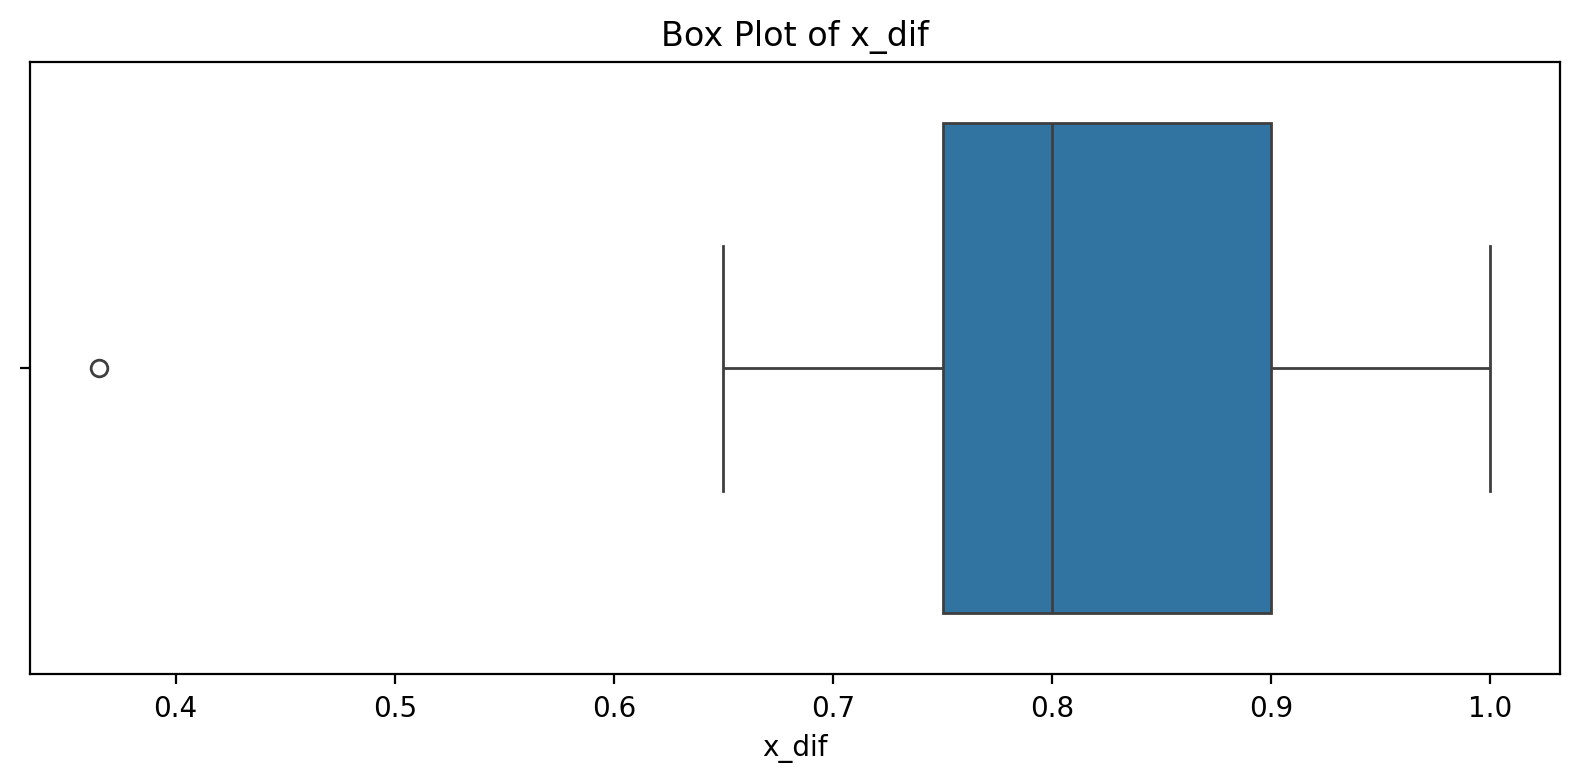

In [16]:
# Box plot to identify outliers in the target variable
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[target_variable])
plt.title(f"Box Plot of {target_variable}")
plt.xlabel(target_variable)
plt.tight_layout()
plt.show()
